<a href="https://colab.research.google.com/github/ShitalBorganve/AI/blob/master/PCA%20Analyses%20And%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

going to apply Principal component analysis on the given dataset using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).Features with little variance in the data are then projected into new lower dimension. Then the models are trained on transformed dataset to apply machine learning models.Then I have applied Random forest Regressor on old and the transformed datasets and compared them. 

---



---



In [2]:
 !pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"shitalborganve","key":"faec5c760c94cf6f9e18295a22cd76a4"}'}

In [5]:
 !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list -s pmu

ref                                                          title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
jacklewis0221/berkeley-micropmu-part3                        Berkeley micro-PMU Part-3 (a6 Bus 1)                 2GB  2019-11-08 18:26:05             22  
saurabhshahane/black-box-attack                              Black Box Attack Dataset                           183MB  2021-05-10 17:49:51             20  
jacklewis0221/micro-pmu-october-1-dataset                    Micro PMU October 1 Dataset                        656MB  2019-11-21 20:01:33             81  
danielefm/pesquisa-de-mobilidade-urbana-do-distrito-federal  Pesquisa de Mobilidade Urbana do Distrito Federal    4MB  2020-07-04 19:14:07             25  
jacklewis0221/berkeley-micropmu-part4-grizzly-bus            Ber

In [8]:
!kaggle datasets download jacklewis0221/micro-pmu-october-1-dataset

micro-pmu-october-1-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!rm -rf berkeley-micropmu-part2.zip _LBNL_a6_bus1_C2ANG.csv _LBNL_a6_bus1_C2MAG.csv _LBNL_a6_bus1_C3MAG.csv _LBNL_a6_bus1_C1ANG.csv _LBNL_a6_bus1_C1MAG.csv

In [10]:
!ls

'kaggle (1).json'   _LBNL_a6_bus1_2015-10-01.csv      sample_data
 kaggle.json	    micro-pmu-october-1-dataset.zip


In [11]:
!unzip micro-pmu-october-1-dataset.zip

Archive:  micro-pmu-october-1-dataset.zip
replace _LBNL_a6_bus1_2015-10-01.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: _LBNL_a6_bus1_2015-10-01.csv  


In [32]:
!ls

'kaggle (1).json'   _LBNL_a6_bus1_2015-10-01.csv      sample_data
 kaggle.json	    micro-pmu-october-1-dataset.zip


In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "_LBNL_a6_bus1_2015-10-01.csv"]).decode("utf8"))
print(check_output(["ls", "_LBNL_a6_bus1_2015-10-01.csv"]).decode("utf8"))

_LBNL_a6_bus1_2015-10-01.csv



In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [15]:
#df=pd.read_csv('_LBNL_a6_bus1_2015-10-01.csv') #Replace it with your path where the data file is stored
df=pd.read_csv('_LBNL_a6_bus1_2015-10-01.csv')
df.head(10)

,Unnamed: 0,Time,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3,Events
0,0,1.443658e+18,7469.341309,7471.521973,7502.064941,357.882660,238.087585,117.906738,17.962173,23.941633,22.525549,331.211426,217.019165,83.222740,0.0
1,1,1.443658e+18,7469.608398,7471.703613,7502.192383,357.923859,238.127411,117.947227,17.919218,23.878366,22.482040,331.182648,217.118896,83.163498,0.0
2,2,1.443658e+18,7469.810059,7471.809570,7502.267090,357.964386,238.167465,117.988358,17.974640,23.824940,22.474831,331.134674,217.293427,83.222931,0.0
3,3,1.443658e+18,7469.842773,7471.927734,7502.214844,358.002319,238.206512,118.026810,18.037073,23.916128,22.507301,331.074158,217.476486,83.319588,0.0
4,4,1.443658e+18,7469.822266,7472.120605,7502.244141,358.040131,238.245026,118.063675,18.042921,24.034710,22.512310,331.187775,217.613770,83.421730,0.0
5,5,1.443658e+18,7469.869629,7472.167969,7502.477051,358.079712,238.284454,118.102776,18.110378,24.065283,22.557707,331.802063,217.660187,83.466385,0.0
6,6,1.443658e+18,7470.055176,7472.142090,7502.617676,358.119995,238.324768,118.144516,18.149937,24.040121,22.549370,332.270844,217.680389,83.447586,0.0
7,7,1.443658e+18,7470.196289,7472.101074,7502.752930,358.161194,238.365677,118.185562,18.063368,23.943027,22.500162,332.062622,217.655640,83.418373,0.0
8,8,1.443658e+18,7470.245605,7472.173828,7503.036621,358.205109,238.408966,118.227295,18.048748,23.879206,22.462141,331.928101,217.534683,83.524422,0.0
9,9,1.443658e+18,7470.307129,7472.336914,7503.109375,358.249359,238.453995,118.272568,18.064680,23.878237,22.386927,331.793396,217.496460,83.698212,0.0


In [16]:
print(len(df)) #print number of rows
print(len(df.columns)) # print number of columns

10368000
15


In [17]:
df=df.iloc[:,2:14] # To discard serial no,Time column and events column so that Effective parameters (features) are taken

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368000 entries, 0 to 10367999
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   VL1     float64
 1   VL2     float64
 2   VL3     float64
 3   AL1     float64
 4   AL2     float64
 5   AL3     float64
 6   IC1     float64
 7   IC2     float64
 8   IC3     float64
 9   AC1     float64
 10  AC2     float64
 11  AC3     float64
dtypes: float64(12)
memory usage: 949.2 MB


In [19]:
print(len(df))
print(len(df.columns))

10368000
12


In [35]:
df.head()

,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3
0,7469.341309,7471.521973,7502.064941,357.882660,238.087585,117.906738,17.962173,23.941633,22.525549,331.211426,217.019165,83.222740
1,7469.608398,7471.703613,7502.192383,357.923859,238.127411,117.947227,17.919218,23.878366,22.482040,331.182648,217.118896,83.163498
2,7469.810059,7471.809570,7502.267090,357.964386,238.167465,117.988358,17.974640,23.824940,22.474831,331.134674,217.293427,83.222931
3,7469.842773,7471.927734,7502.214844,358.002319,238.206512,118.026810,18.037073,23.916128,22.507301,331.074158,217.476486,83.319588
4,7469.822266,7472.120605,7502.244141,358.040131,238.245026,118.063675,18.042921,24.034710,22.512310,331.187775,217.613770,83.421730


In [21]:
print(len(df))

10368000


In [22]:
df.describe()

,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3
count,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07
mean,7.458856e+03,7.462810e+03,7.489420e+03,1.802060e+02,1.807175e+02,1.782894e+02,1.670535e+01,2.236628e+01,2.101658e+01,1.819780e+02,1.801835e+02,1.784088e+02
std,2.478275e+01,2.407502e+01,2.313949e+01,1.048610e+02,1.032435e+02,1.036218e+02,3.022347e+00,3.197779e+00,3.372325e+00,1.046192e+02,1.031683e+02,1.041125e+02
min,7.404294e+03,7.378416e+03,7.406410e+03,-1.908470e-01,-1.747510e-01,-1.656410e-01,1.245518e+01,1.775873e+01,1.635792e+01,-2.002665e+00,-2.193254e+00,-1.434109e+00
25%,7.439010e+03,7.445171e+03,7.470300e+03,8.828184e+01,9.139122e+01,8.891262e+01,1.398549e+01,1.949384e+01,1.801152e+01,9.114123e+01,9.196667e+01,8.821212e+01
50%,7.453867e+03,7.456519e+03,7.486474e+03,1.805257e+02,1.822821e+02,1.770521e+02,1.582690e+01,2.134891e+01,1.993347e+01,1.826208e+02,1.811770e+02,1.767104e+02
75%,7.470381e+03,7.474170e+03,7.501033e+03,2.717824e+02,2.687109e+02,2.683523e+02,1.920222e+01,2.502223e+01,2.380603e+01,2.734425e+02,2.687571e+02,2.686675e+02
max,7.523722e+03,7.526080e+03,7.549327e+03,3.601789e+02,3.601855e+02,3.601930e+02,2.733830e+01,3.341502e+01,3.285428e+01,3.644731e+02,3.623845e+02,3.628858e+02


In [36]:
df.corr()

,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3
VL1,1.000000,0.992254,0.996803,-0.015824,-0.008572,0.016172,-0.550148,-0.548662,-0.549772,-0.014535,0.002983,0.015128
VL2,0.992254,1.000000,0.984508,-0.014971,-0.007013,0.015294,-0.458634,-0.457697,-0.458458,-0.013606,0.003604,0.014449
VL3,0.996803,0.984508,1.000000,-0.018439,-0.008637,0.016824,-0.575834,-0.574078,-0.575426,-0.016217,0.003272,0.015899
AL1,-0.015824,-0.014971,-0.018439,1.000000,-0.331807,-0.335660,0.013269,0.013642,0.013503,0.567632,-0.431248,-0.074215
AL2,-0.008572,-0.007013,-0.008637,-0.331807,1.000000,-0.333106,0.017253,0.017230,0.017964,-0.138459,0.653734,-0.474899
AL3,0.016172,0.015294,0.016824,-0.335660,-0.333106,1.000000,-0.014897,-0.015517,-0.015568,-0.454278,-0.184826,0.454328
IC1,-0.550148,-0.458634,-0.575834,0.013269,0.017253,-0.014897,1.000000,0.996310,0.996496,0.015790,0.007161,-0.015284
IC2,-0.548662,-0.457697,-0.574078,0.013642,0.017230,-0.015517,0.996310,1.000000,0.996780,0.015497,0.007184,-0.015295
IC3,-0.549772,-0.458458,-0.575426,0.013503,0.017964,-0.015568,0.996496,0.996780,1.000000,0.015991,0.007471,-0.015722
AC1,-0.014535,-0.013606,-0.016217,0.567632,-0.138459,-0.454278,0.015790,0.015497,0.015991,1.000000,-0.296020,-0.287603


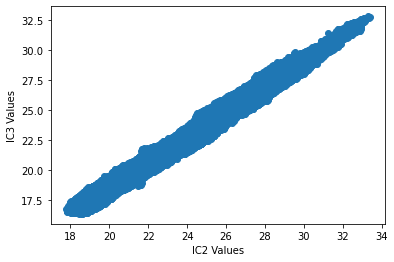

In [24]:
x=df['IC2']
y=df['IC3']
colors=()
plt.xlabel('IC2 Values')
plt.ylabel('IC3 Values')
#plt.scatter(x,y,c=colors)
plt.scatter(x,y)
plt.show()

In [25]:
X = df.iloc[:,0:12]  # all columns, all the features and no labels

y = df.iloc[:, 0]  # all rows, label only
X
#y

,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3
0,7469.341309,7471.521973,7502.064941,357.882660,238.087585,117.906738,17.962173,23.941633,22.525549,331.211426,217.019165,83.222740
1,7469.608398,7471.703613,7502.192383,357.923859,238.127411,117.947227,17.919218,23.878366,22.482040,331.182648,217.118896,83.163498
2,7469.810059,7471.809570,7502.267090,357.964386,238.167465,117.988358,17.974640,23.824940,22.474831,331.134674,217.293427,83.222931
3,7469.842773,7471.927734,7502.214844,358.002319,238.206512,118.026810,18.037073,23.916128,22.507301,331.074158,217.476486,83.319588
4,7469.822266,7472.120605,7502.244141,358.040131,238.245026,118.063675,18.042921,24.034710,22.512310,331.187775,217.613770,83.421730
...,...,...,...,...,...,...,...,...,...,...,...,...
10367995,7449.165039,7456.950684,7480.336426,246.722046,126.890938,6.705578,19.834072,25.779219,24.732191,219.673431,106.065033,332.553558
10367996,7449.188477,7456.961914,7480.250000,246.876434,127.044991,6.860225,19.964079,25.828913,24.654770,220.252289,105.900620,332.800079
10367997,7449.098633,7456.850586,7480.319336,247.028961,127.198547,7.013916,20.117683,25.952682,24.562939,220.646881,105.807594,333.065369
10367998,7448.999512,7456.692871,7480.238281,247.181381,127.351089,7.167124,20.179417,25.919607,24.514606,220.681915,105.968452,333.106323


In [35]:
#y = df.iloc[:, 1]  # all rows, label only

In [26]:
df.corr()

,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3
VL1,1.000000,0.992254,0.996803,-0.015824,-0.008572,0.016172,-0.550148,-0.548662,-0.549772,-0.014535,0.002983,0.015128
VL2,0.992254,1.000000,0.984508,-0.014971,-0.007013,0.015294,-0.458634,-0.457697,-0.458458,-0.013606,0.003604,0.014449
VL3,0.996803,0.984508,1.000000,-0.018439,-0.008637,0.016824,-0.575834,-0.574078,-0.575426,-0.016217,0.003272,0.015899
AL1,-0.015824,-0.014971,-0.018439,1.000000,-0.331807,-0.335660,0.013269,0.013642,0.013503,0.567632,-0.431248,-0.074215
AL2,-0.008572,-0.007013,-0.008637,-0.331807,1.000000,-0.333106,0.017253,0.017230,0.017964,-0.138459,0.653734,-0.474899
AL3,0.016172,0.015294,0.016824,-0.335660,-0.333106,1.000000,-0.014897,-0.015517,-0.015568,-0.454278,-0.184826,0.454328
IC1,-0.550148,-0.458634,-0.575834,0.013269,0.017253,-0.014897,1.000000,0.996310,0.996496,0.015790,0.007161,-0.015284
IC2,-0.548662,-0.457697,-0.574078,0.013642,0.017230,-0.015517,0.996310,1.000000,0.996780,0.015497,0.007184,-0.015295
IC3,-0.549772,-0.458458,-0.575426,0.013503,0.017964,-0.015568,0.996496,0.996780,1.000000,0.015991,0.007471,-0.015722
AC1,-0.014535,-0.013606,-0.016217,0.567632,-0.138459,-0.454278,0.015790,0.015497,0.015991,1.000000,-0.296020,-0.287603


Text(0.5, 1.0, 'Correlation between different fearures')

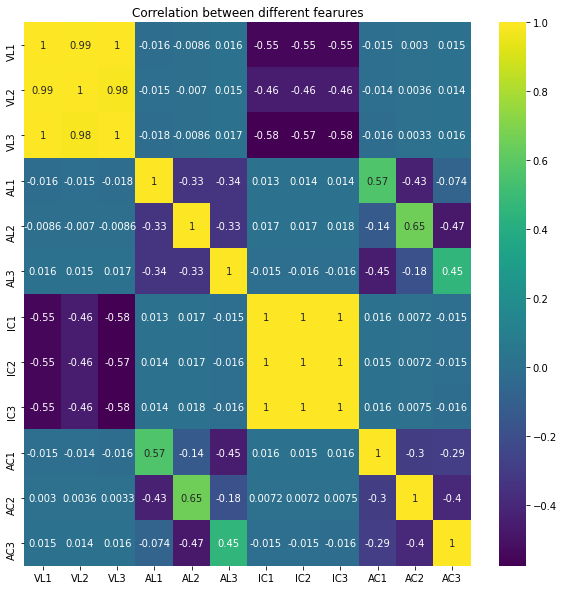

In [27]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=False,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In Numeracal Data processing, The data is scaled to normal range to get better results.

**Numerical Data Scaling Methods** using the scikit-learn library.

1. ***Normalization*** 

A value is normalized as follows:

y = (x – min) / (max – min)
Where the minimum and maximum values pertain to the value x being normalized.

For Ex:

 for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, like 18.8, as follows:

y = (x – min) / (max – min)

y = (18.8 – (-10)) / (30 – (-10))

y = 28.8 / 40

y = 0.72



2. ***Standardization***  

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

A value is standardized as follows:

y = (x – mean) / standard_deviation

Where the mean is calculated as:

mean = sum(x) / count(x)

And the standard_deviation is calculated as:

standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

y = (x – mean) / standard_deviation

y = (20.7 – 10) / 5

y = (10.7) / 5

y = 2.14

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

You can standardize your dataset using the scikit-learn object **StandardScaler.**



***NOTE: BELOW EXAMPLE IS NOT PART OF THE PROJECT, ITS JUST FOR TO KNOW STANDARDSCALAR***

In [ ]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

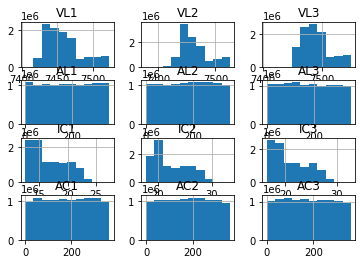

In [28]:
from matplotlib import pyplot
df.hist()
pyplot.show()

In [29]:
df.head()

,VL1,VL2,VL3,AL1,AL2,AL3,IC1,IC2,IC3,AC1,AC2,AC3
0,7469.341309,7471.521973,7502.064941,357.882660,238.087585,117.906738,17.962173,23.941633,22.525549,331.211426,217.019165,83.222740
1,7469.608398,7471.703613,7502.192383,357.923859,238.127411,117.947227,17.919218,23.878366,22.482040,331.182648,217.118896,83.163498
2,7469.810059,7471.809570,7502.267090,357.964386,238.167465,117.988358,17.974640,23.824940,22.474831,331.134674,217.293427,83.222931
3,7469.842773,7471.927734,7502.214844,358.002319,238.206512,118.026810,18.037073,23.916128,22.507301,331.074158,217.476486,83.319588
4,7469.822266,7472.120605,7502.244141,358.040131,238.245026,118.063675,18.042921,24.034710,22.512310,331.187775,217.613770,83.421730


                 0             1   ...            10            11
count  1.036800e+07  1.036800e+07  ...  1.036800e+07  1.036800e+07
mean  -4.228492e-13  2.638626e-14  ... -2.469721e-15  3.103947e-15
std    1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00
min   -2.201626e+00 -3.505449e+00  ... -1.767759e+00 -1.727389e+00
25%   -8.008009e-01 -7.326629e-01  ... -8.550766e-01 -8.663383e-01
50%   -2.013338e-01 -2.612970e-01  ...  9.629738e-03 -1.631323e-02
75%    4.650430e-01  4.718645e-01  ...  8.585356e-01  8.669339e-01
max    2.617380e+00  2.628048e+00  ...  1.766056e+00  1.771900e+00

[8 rows x 12 columns]


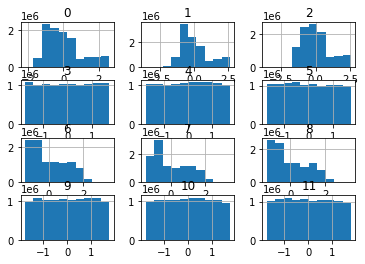

In [30]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
scaler = StandardScaler()
X=scaler.fit_transform(X) #The out put is in the form of array
X
dataset = DataFrame(X) # Convert array into data frame

#Summerize
print(dataset.describe())

# histograms of the variables
dataset.hist()
pyplot.show()

In [31]:
from sklearn.decomposition import PCA
pca = PCA() #PCA object is initialized with 0 components, so it takes all 12 components by default
x_data = pca.fit_transform(X)

In [41]:
#Convert x_data to a dataFrame
data_trans = DataFrame(x_data)

data_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.086300,-0.280927,2.289583,-1.094404,-0.259828,-0.504153,-0.206901,-0.896145,-0.218553,0.012705,0.005943,0.005522
1,0.057443,-0.281964,2.290472,-1.085150,-0.260204,-0.504987,-0.206924,-0.896809,-0.214883,0.011024,0.001726,0.008601
2,0.050809,-0.282966,2.290021,-1.091347,-0.259733,-0.505852,-0.206416,-0.898016,-0.209688,-0.012112,-0.005195,0.013433
3,0.073336,-0.283855,2.288409,-1.117169,-0.258974,-0.506731,-0.205748,-0.899078,-0.208312,-0.011342,0.008415,0.013640
4,0.086604,-0.284232,2.288079,-1.137512,-0.258578,-0.506514,-0.205083,-0.900762,-0.210485,0.005761,0.031465,0.008188


The **PCA** class contains ***explained_variance_ratio_*** which returns the variance caused by each of the **principal components**. Execute the following line of code to find the "explained variance ratio".

In [37]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.81326951e-01, 1.94466922e-01, 1.77231553e-01, 1.17696621e-01,
       4.26431571e-02, 3.34122550e-02, 2.67410827e-02, 2.52950729e-02,
       5.14782999e-04, 3.06891083e-04, 2.64440435e-04, 1.00270723e-04])

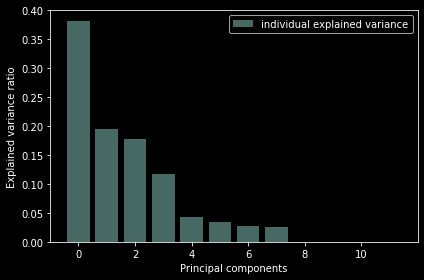

In [38]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(12), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [45]:
pca=PCA(n_components=4)
X_new=pca.fit_transform(X)
trans_new_data = DataFrame(X_new)

trans_new_data.describe()

,0,1,2,3
count,1.036800e+07,1.036800e+07,1.036800e+07,1.036800e+07
mean,-8.102864e-14,-7.334534e-16,6.515780e-16,2.974012e-14
std,2.139141e+00,1.527614e+00,1.458348e+00,1.188427e+00
min,-4.606730e+00,-2.049972e+00,-1.568790e+00,-3.084519e+00
25%,-1.340843e+00,-1.874126e+00,-1.225777e+00,-9.779222e-01
50%,-8.898333e-02,-2.180305e-01,-9.596277e-01,-2.499970e-01
75%,1.602784e+00,1.939519e+00,9.871496e-01,9.481493e-01
max,5.750716e+00,2.110275e+00,2.439076e+00,4.086759e+00


In [48]:
trans_new_data.to_csv('cpressed_data.csv', encoding='utf-8')


In [51]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.38132695, 0.19446692, 0.17723155, 0.11769662])

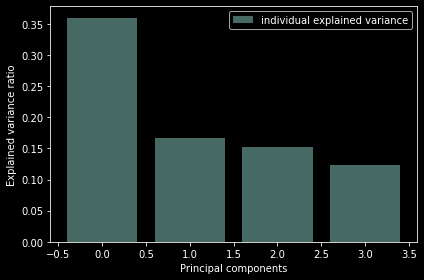

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
Xtrain_dim = X_train.shape
Xtest_dim = X_test.shape
print(Xtrain_dim)
print(Xtest_dim)

(8294400, 12)
(2073600, 12)


In [53]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [54]:
# Try different numbers of n_estimators - this will take a minute or so
#estimators = np.arange(10, 200, 10)
estimators = np.arange(10, 20, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
print(scores)

KeyboardInterrupt: ignored

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape
y_train.shape

(8294400,)

In [ ]:
# Establish model
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')

In [ ]:
a = []
while(1):
  a.append('1')

In [ ]:
!ls

kaggle.json		      micro-pmu-october-1-dataset.zip
_LBNL_a6_bus1_2015-10-01.csv  sample_data


In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
#estimators = np.arange(10, 20, 10)
estimators = np.arange(2)
print(estimators)
scores = []
#for n in estimators:
#    model.set_params(n_estimators=n)
#   model.fit(X_train, y_train)
#    scores.append(model.score(X_test, y_test))

model.set_params()
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))
print(scores)  

[0 1]
